In [1]:
# 2.1 Basic Matplotlib plots
import matplotlib.pyplot as plt

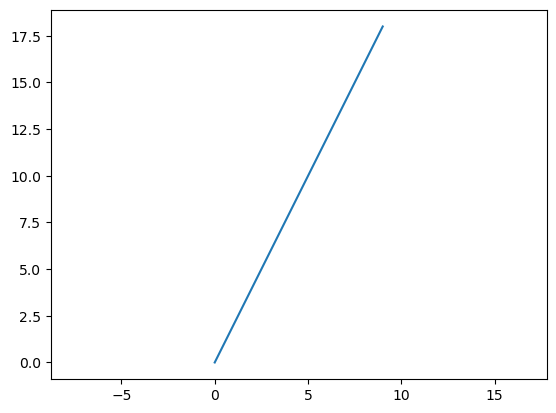

In [3]:
# Plotting a linear line
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)

# equalizes the spacing of the numbers on the axises
plt.axis('equal')
plt.show()

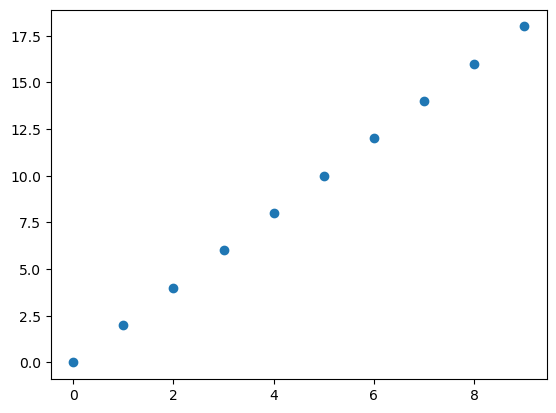

In [4]:
# Scatter instead
plt.scatter(x, y)
plt.show()

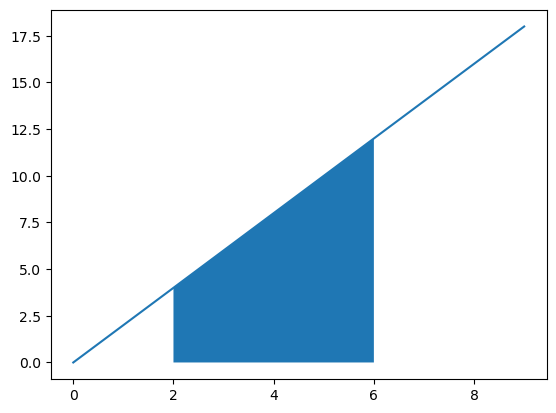

In [6]:
# Highlighting a range of values
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

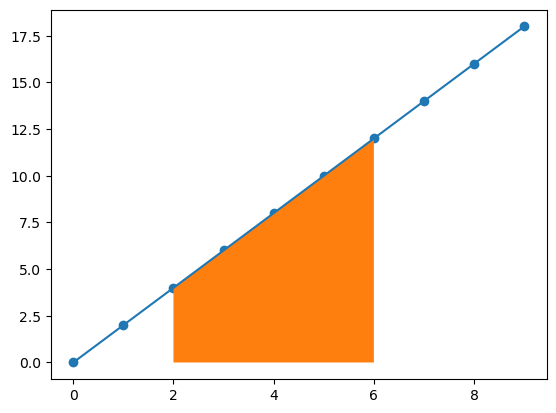

In [7]:
# Exposing individual coordinates within a continuous plot
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

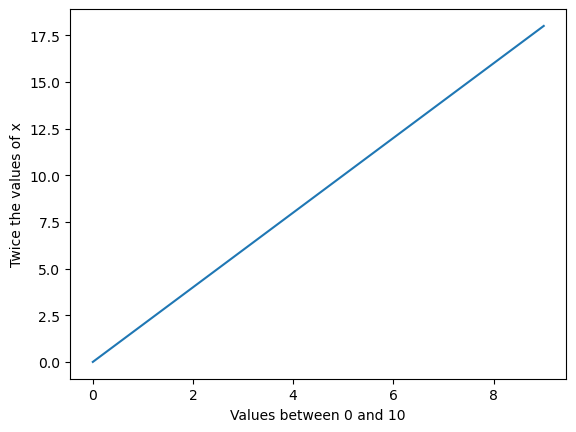

In [9]:
# Adding axis labels
plt.plot(x, y)
plt.xlabel('Values between 0 and 10')
plt.ylabel('Twice the values of x')
plt.show()

In [12]:
# 2.2 Plotting Coin-Flip Probabilities
from collections import defaultdict
from itertools import product
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1
    
    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()

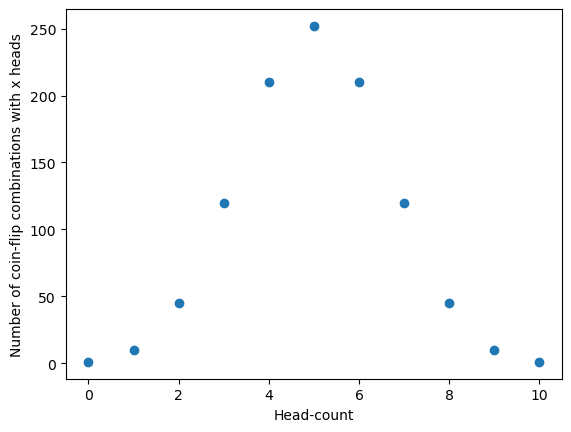

In [13]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

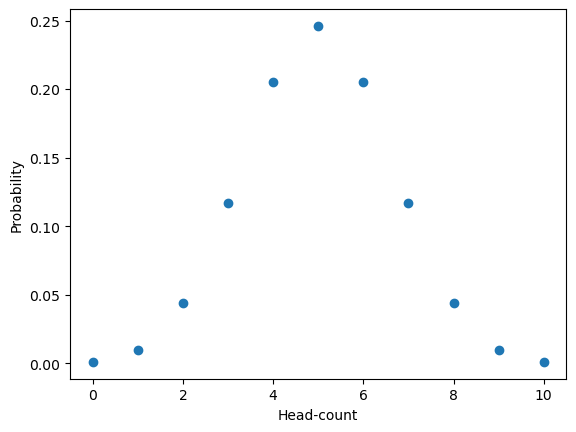

In [14]:
# Plotting the probabilities and not counts
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [15]:
# Confirm that the probabilites sum to 1.0
assert sum(prob_x_10_flips) == 1.0

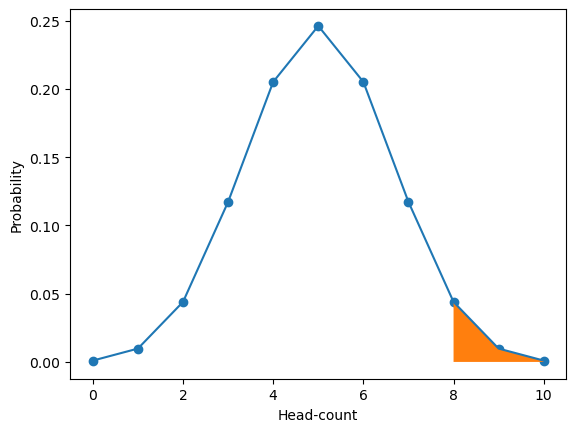

In [16]:
# Shading the interval under a probability curve
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

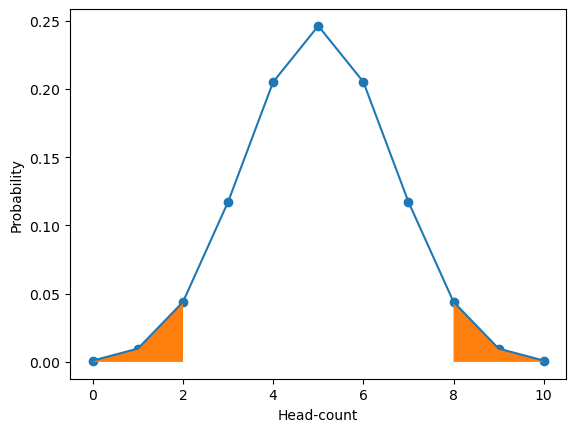

In [18]:
# Shading the interval under a probability curve
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [21]:
# 2.2.1 Comparing Multiple Coin-Flip Probability Distributions
# 20 coin set:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

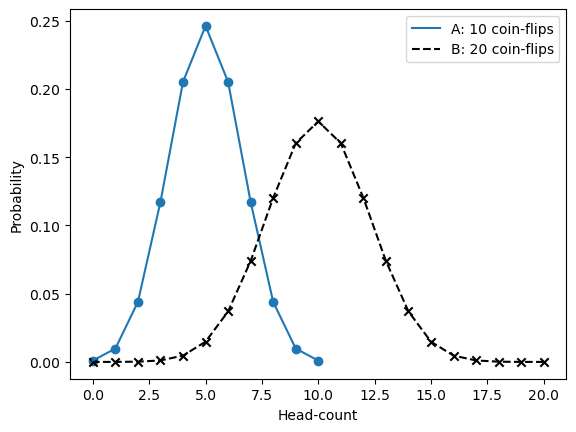

In [22]:
# Plotting both the 10 and 20 coin flips
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--', label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()

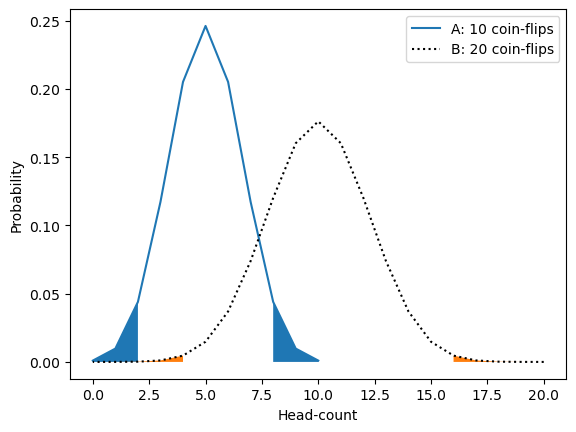

In [23]:
# Showing Interval Highlighting on both sets
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle=':', label='B: 20 coin-flips')

where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()

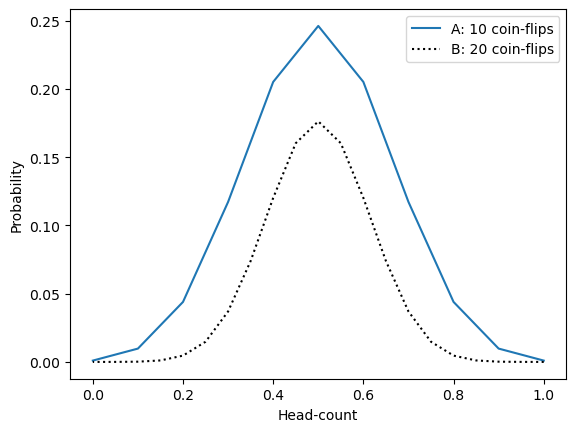

In [24]:
# Converting head counts into frequencies to align both lines
x_10_frequencies = [head_count /10 for head_count in x_10_flips]
x_20_frequencies = [head_count /20 for head_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, color='black', linestyle=':', label='B: 20 coin-flips')
plt.legend()

plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [27]:
# Recreating the curve so the area under the curve is 1 with relative_likelihoods
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

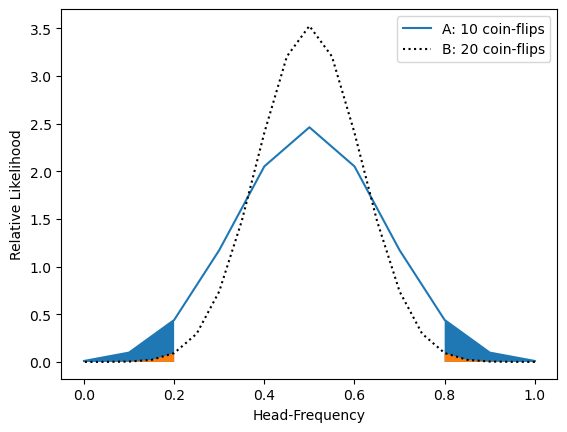

In [28]:
# Plotting aligned relative likelihood curves
plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, relative_likelihood_20, color='black', linestyle=':', label='B: 20 coin-flips')

plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.legend()
plt.xlabel('Head-Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [ ]:
# Key Words / Notes
# Probability Distribution: Every possible numberic observation versus its probability.
#   The total area beneath a probability distribution sums to 1.0
# Law of Large Numbers: The frequency of any observation will approach the probability of that observation 
#   as the observation count grows to large.